<a href="https://colab.research.google.com/github/zoya-ivanova/BigData/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9C%D0%BE%D0%BD%D1%82%D0%B5_%D0%9A%D0%B0%D1%80%D0%BB%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вычисление числа $\pi$ методом Монте-Карло.
$$P = \dfrac{S_{круга}}{S_{квадрата}} = \dfrac{\pi r^2}{a^2} = \dfrac{\pi r^2}{(2r)^2} = \dfrac{\pi}{4},$$ или $$\pi = 4P$$.

In [ ]:
import random
import time
import math
import multiprocessing

def monte_carlo_pi(num_samples, seed):
    random.seed(seed)
    inside_circle = 0
    for _ in range(num_samples):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        distance = x**2 + y**2
        if distance <= 1:
            inside_circle += 1
    return (inside_circle / num_samples) * 4

def parallel_monte_carlo_pi(num_samples):
    num_samples_per_processor = num_samples // 2

    # Создаем пул из двух процессов
    pool = multiprocessing.Pool(processes=2)

    # Вычисляем значение π параллельно в двух процессах
    results = pool.starmap(monte_carlo_pi, [(num_samples_per_processor, i) for i in range(2)])

    # Завершаем работу пула процессов
    pool.close()
    pool.join()

    # Среднее значение результатов от двух процессов
    result_parallel = sum(results) / 2

    return result_parallel

if __name__ == "__main__":
    num_samples = 10**8  # Количество случайных точек для генерации

    # Вычисление числа π с заданным количеством точек последовательно
    start_time = time.time()
    result_sequential = monte_carlo_pi(num_samples, 0)
    end_time = time.time()
    sequential_time = end_time - start_time

    # Вычисление числа π с заданным количеством точек параллельно
    start_time = time.time()
    result_parallel = parallel_monte_carlo_pi(num_samples)
    end_time = time.time()
    parallel_time = end_time - start_time
    true_pi = math.pi
    error_sequential = abs(result_sequential - true_pi)
    error_parallel = abs(result_parallel - true_pi)

    print(f"Результат последовательного вычисления числа π: {result_sequential}")
    print(f"Время выполнения последовательного вычисления: {sequential_time} секунд")
    print(f"Абсолютная ошибка последовательного вычисления: {error_sequential}")

    print(f"Результат параллельного вычисления числа π: {result_parallel}")
    print(f"Время выполнения параллельного вычисления: {parallel_time} секунд")
    print(f"Абсолютная ошибка параллельного вычисления: {error_parallel}")

Результат последовательного вычисления числа π: 3.14162348
Время выполнения последовательного вычисления: 118.11988091468811 секунд
Абсолютная ошибка последовательного вычисления: 3.082641020668575e-05
Результат параллельного вычисления числа π: 3.1416284799999996
Время выполнения параллельного вычисления: 97.28136134147644 секунд
Абсолютная ошибка параллельного вычисления: 3.582641020649646e-05


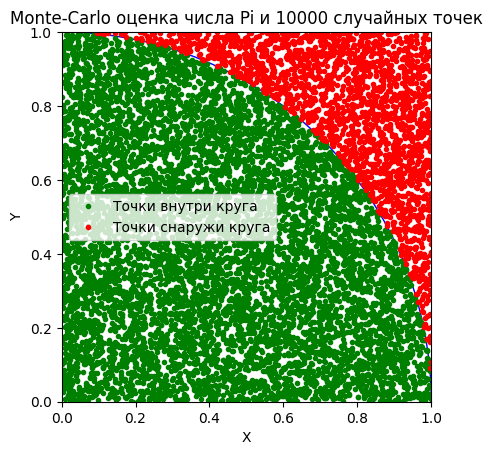

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Количество случайных точек для создания
num_samples = 10000

# Создадим массив случайных точек
random.seed(0)
points_x = [random.uniform(0, 1) for _ in range(num_samples)]
points_y = [random.uniform(0, 1) for _ in range(num_samples)]

# Разобьем точки на две категории: внутри круга и снаружи круга
inside_x, inside_y, outside_x, outside_y = [], [], [], []

for i in range(num_samples):
    x, y = points_x[i], points_y[i]
    distance = x ** 2 + y ** 2
    if distance <= 1:
        inside_x.append(x)
        inside_y.append(y)
    else:
        outside_x.append(x)
        outside_y.append(y)

# Визуализация
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_patch(circle)
ax.plot(inside_x, inside_y, 'go', markersize=3, label='Точки внутри круга')
ax.plot(outside_x, outside_y, 'ro', markersize=3, label='Точки снаружи круга')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Monte-Carlo оценка числа Pi и {num_samples} случайных точек')
ax.legend()
plt.show()